In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [138]:
customer = pd.read_csv(r"E:\New folder\AnalytixLabs\Python\case study\Python Foundation Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")

In [139]:
spend = pd.read_csv(r"E:\New folder\AnalytixLabs\Python\case study\Python Foundation Case Study 2 - Credit Card Case Study\spend.csv")

In [140]:
repay = pd.read_csv(r"E:\New folder\AnalytixLabs\Python\case study\Python Foundation Case Study 2 - Credit Card Case Study\Repayment.csv")

In [141]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [142]:
customer.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [143]:
customer.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [144]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [145]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [146]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [147]:
repay.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [148]:
repay.dtypes

SL No:        float64
Customer       object
Month          object
Amount        float64
Unnamed: 4    float64
dtype: object

In [149]:
repay.isnull().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [150]:
repay.drop(columns='Unnamed: 4',inplace=True)

In [151]:
repay.head()

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88


In [152]:
repay.dropna(inplace=True)

In [153]:
repay.isnull().sum()

SL No:      0
Customer    0
Month       0
Amount      0
dtype: int64

In [154]:
repay

,SL No:,Customer,Month,Amount
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
5,6.0,A1,23-Feb-05,365366.62
...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77
1496,1497.0,A68,10-May-06,319836.49
1497,1498.0,A69,11-Jul-06,247628.45
1498,1499.0,A70,12-Aug-05,454016.51


### 1. In the above dataset,

#### a. In case age is less than 18, replace it with mean of age values.

In [155]:
mean_real = customer["Age"].mean()

In [156]:
mean_real

46.49

In [157]:
customer.loc[customer["Age"] < 18,"Age"] = customer["Age"].mean()

In [158]:
mean_new = customer["Age"].mean()

In [159]:
mean_new

48.39940000000001

In [160]:
print("The new mean of Age column is",mean_new)

The new mean of Age column is 48.39940000000001


#### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
#### (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [161]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [162]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [163]:
# inner join on 'Customer'

customer_spend = pd.merge(left=customer,right=spend,on="Customer",how="inner")
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [164]:
# finding customers who spend more than their limit

customer_spend[customer_spend["Amount"] > customer_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104,3-Jan-04,RENTAL,199554.72
19,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,118,28-Feb-05,TRAIN TICKET,376887.49
20,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,132,6-Apr-04,BUS TICKET,439648.53
21,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,146,23-Nov-04,PETRO,384078.73
22,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,160,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,89,30-Mar-06,RENTAL,483886.62
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22


In [165]:
# replacing with 50% of that customer’s limit

customer_spend.loc[customer_spend["Amount"] > customer_spend["Limit"],"Amount"] = (50 * customer_spend["Limit"]).div(100)

In [166]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


#### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [167]:
repay.head()

,SL No:,Customer,Month,Amount
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
5,6.0,A1,23-Feb-05,365366.62


In [168]:
# inner join on 'customer'

customer_repay = pd.merge(left=repay,right=customer,on="Customer",how="inner")

In [169]:
customer_repay

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,2.0,A1,3-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,3.0,A1,15-Jan-04,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,4.0,A1,25-Jan-04,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,5.0,A1,17-Jan-05,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,6.0,A1,23-Feb-05,365366.62,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...
1494,277.0,A7,22-Nov-05,55108.71,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1495,295.0,A7,3-Dec-05,429700.12,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,313.0,A7,23-Feb-05,344628.72,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,331.0,A7,31-Mar-06,336264.37,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [170]:
# finding customers with repayment more than limit

customer_repay[customer_repay["Amount"] > customer_repay["Limit"]]

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
17,8.0,A8,5-Feb-04,156913.59,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
18,110.0,A8,12-Jan-04,350999.98,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
19,124.0,A8,31-Mar-06,155642.95,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
20,138.0,A8,9-May-05,145457.38,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
21,152.0,A8,8-May-06,361184.89,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
...,...,...,...,...,...,...,...,...,...,...,...
1493,259.0,A7,6-May-06,400375.97,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1495,295.0,A7,3-Dec-05,429700.12,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,313.0,A7,23-Feb-05,344628.72,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,331.0,A7,31-Mar-06,336264.37,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [171]:
# replacing with limit

customer_repay.loc[customer_repay["Amount"] > customer_repay["Limit"],"Amount"] = customer_repay["Limit"]

In [172]:
customer_repay

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,2.0,A1,3-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,3.0,A1,15-Jan-04,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,4.0,A1,25-Jan-04,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,5.0,A1,17-Jan-05,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,6.0,A1,23-Feb-05,365366.62,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...
1494,277.0,A7,22-Nov-05,55108.71,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1495,295.0,A7,3-Dec-05,100001.00,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,313.0,A7,23-Feb-05,100001.00,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,331.0,A7,31-Mar-06,100001.00,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


## From the above dataset create the following summaries:

#### How many distinct customers exist?

In [173]:
distinct_customers = customer["Customer"].nunique()

In [174]:
distinct_customers

100

In [175]:
print("Number of distinct customers are",distinct_customers)

Number of distinct customers are 100


#### How many distinct categories exist?

In [176]:
customer["Segment"].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


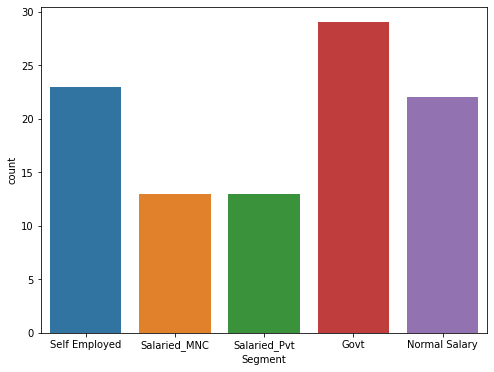

In [177]:
plt.figure(figsize=(8,6))
sns.countplot('Segment',data=customer)
plt.show()

In [178]:
print("We can see from the countplot that number of distinct categories are", len(customer["Segment"].value_counts()))

We can see from the countplot that number of distinct categories are 5


#### What is the average monthly spend by customers?

In [179]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [180]:
# convert month to datetime

spend['Month'] = pd.to_datetime(spend['Month'])

In [181]:
spend['Month'].dtypes

dtype('<M8[ns]')

In [182]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07


In [183]:
# splitting month and year

spend['Months'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spend['Year'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [184]:
spend

,Sl No:,Customer,Month,Type,Amount,Months,Year
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005
...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,February,2006
1496,1497,A68,2006-03-25,BUS TICKET,204971.10,March,2006
1497,1498,A69,2006-03-31,BUS TICKET,50449.44,March,2006
1498,1499,A70,2006-03-23,BUS TICKET,80593.94,March,2006


In [185]:
# grouping by year and month with average

spend_new= round(spend.groupby(['Year','Months']).mean(),2)

In [186]:
spend_new

Sl No:     Amount
Year Months                      
2004 April      730.50  235272.04
     February   749.50  221215.27
     January    751.62  251712.07
     March      725.50  232146.12
     May        733.50  217539.24
     November   745.50  270486.40
     September  741.50  310923.38
2005 April      730.00  252181.33
     August     749.50  233734.63
     December   762.50  147503.06
     February   750.67  229802.28
     January    746.50  292741.37
     July       757.50  229116.66
     June       755.50  262688.11
     May        747.30  245696.52
     November   749.50  286143.32
     October    760.50  194568.64
     September  759.50  188666.20
2006 April      744.41  232468.97
     August     770.50  240699.72
     December   774.50  270470.98
     February   757.83  253858.26
     January    763.50  282058.01
     July       754.50  287505.10
     June       768.50  177252.39
     March      750.90  247166.08
     May        744.25  236162.74
     November   758.50  182841.29
     October    772.50  236136.34
     September  771.50  158520.09

#### What is the average monthly repayment by customers?

In [187]:
repay.dtypes

SL No:      float64
Customer     object
Month        object
Amount      float64
dtype: object

In [188]:
repay["Month"] = pd.to_datetime(repay["Month"])

In [189]:
repay["Month"].dtypes

dtype('<M8[ns]')

In [190]:
# splitting month and year from date

repay['Months'] = repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
repay['Year'] = repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [191]:
repay

,SL No:,Customer,Month,Amount,Months,Year
1,2.0,A1,2004-01-03,245899.02,January,2004
2,3.0,A1,2004-01-15,259490.06,January,2004
3,4.0,A1,2004-01-25,437555.12,January,2004
4,5.0,A1,2005-01-17,165972.88,January,2005
5,6.0,A1,2005-02-23,365366.62,February,2005
...,...,...,...,...,...,...
1495,1496.0,A67,2005-05-09,55638.77,May,2005
1496,1497.0,A68,2006-05-10,319836.49,May,2006
1497,1498.0,A69,2006-07-11,247628.45,July,2006
1498,1499.0,A70,2005-08-12,454016.51,August,2005


In [192]:
repay_new= round(repay.groupby(['Year','Months']).mean(),2)

In [193]:
repay_new

SL No:     Amount
Year Months                      
2004 April      805.07  259141.68
     February   764.33  256702.63
     January    746.66  242586.69
     March      800.07  252585.28
     May        760.80  226162.72
     November   744.93  209592.24
     September  788.38  184487.85
2005 April      804.57  212688.63
     August     748.05  264430.92
     December   710.92  320379.34
     February   765.50  238829.27
     January    761.33  240548.10
     July       705.92  239871.48
     June       703.92  210199.82
     May        738.08  263207.37
     November   733.50  256695.12
     October    708.92  219849.96
     September  707.92  247700.17
2006 April      763.03  275472.25
     August     718.92  224143.99
     December   722.92  252736.57
     February   751.97  284489.57
     January    711.92  293475.39
     July       750.95  257936.38
     June       716.92  251990.45
     March      757.00  240851.27
     May        757.20  256920.88
     November   733.59  199399.20
     October    720.92  260765.48
     September  719.92  262533.88

#### What are the top 5 product types?

In [205]:
spend['Type'].value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

####  Which city is having maximum spend?

In [206]:
city_spend = customer_spend.groupby("City")["Amount"].sum().sort_values(ascending=False)
city_spend

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

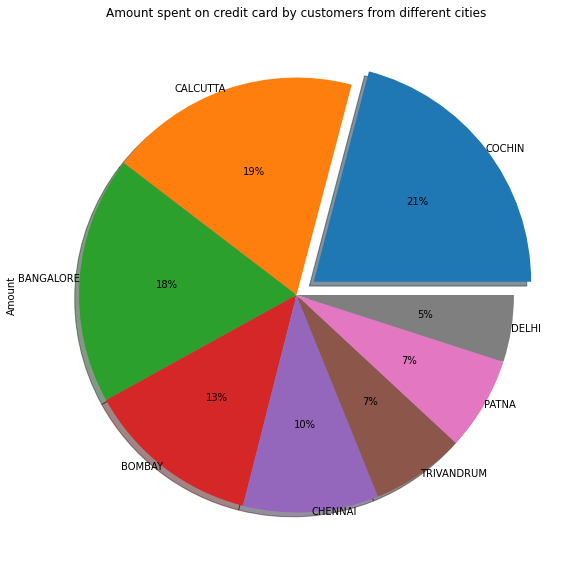

In [207]:
plt.figure(figsize=(10,10))
city_spend.plot(kind="pie",autopct="%1.0f%%",shadow=True,labeldistance=1.0,explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title("Amount spent on credit card by customers from different cities")
plt.show()

#### From above pie chart we can see that Cochin is having maximum spend.

####  Which age group is spending more money?

In [208]:
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00


In [209]:
customer_spend['Age'].max()

79.0

In [210]:
customer_spend['Age'].min()

19.0

In [211]:
# creating a column age group

customer_spend["Age Group"] =  pd.cut(customer_spend["Age"],
                                      bins = np.arange(18,88,8),
                                      labels = ["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"],
                                      include_lowest = True
                                     )

In [212]:
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,74-82
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,74-82
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,74-82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,50-58
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,50-58
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,50-58
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,34-42


In [213]:
age_spend = customer_spend.groupby("Age Group")['Amount'].sum().sort_values(ascending=False)
age_spend

Age Group
42-50    53242390.70
34-42    38037826.50
26-34    30553459.81
18-26    25233896.65
50-58    22454066.68
74-82    19770884.32
66-74    17705877.44
58-66    12782683.13
Name: Amount, dtype: float64

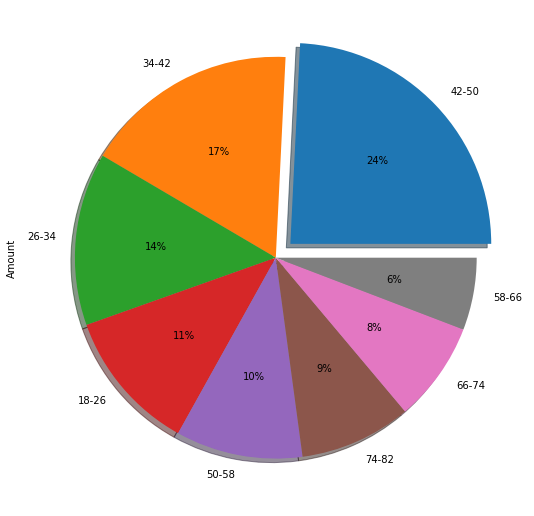

In [214]:
plt.figure(figsize=(9,10))
age_spend.plot(kind = "pie",autopct="%1.0f%%",explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0],shadow=True)
plt.show()

##### From the pie chart shown above we can say that age group 42 - 50 is spending more money

####  Who are the top 10 customers in terms of repayment?

In [215]:
# sorting in descending order

customer_repay.groupby("Customer")[["Amount"]].sum().sort_values(by="Amount",ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


## Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [216]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,74-82
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,74-82
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,74-82


In [217]:
# month to datetime

customer_spend["Month"] = pd.to_datetime(customer_spend["Month"])

In [218]:
# since we need yearly spend,creating a new year column and extracting the year 

customer_spend['Year'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [219]:
customer_spend.head(10)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005
5,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6,2005-02-23,SANDALS,168285.60,74-82,2005
6,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,7,2005-02-01,CAR,23370.20,74-82,2005
7,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,103,2004-01-12,TRAIN TICKET,440563.22,74-82,2004
8,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,117,2004-02-05,BUS TICKET,52208.65,74-82,2004
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,131,2006-04-19,AIR TICKET,346925.68,74-82,2006


In [220]:
# we need a pivot table for better view

customer_spend_pivot = pd.pivot_table(data = customer_spend,
                                      index=["City","Year"],
                                      columns='Product',
                                      aggfunc="sum",
                                      values="Amount"
                                     )

In [221]:
customer_spend_pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

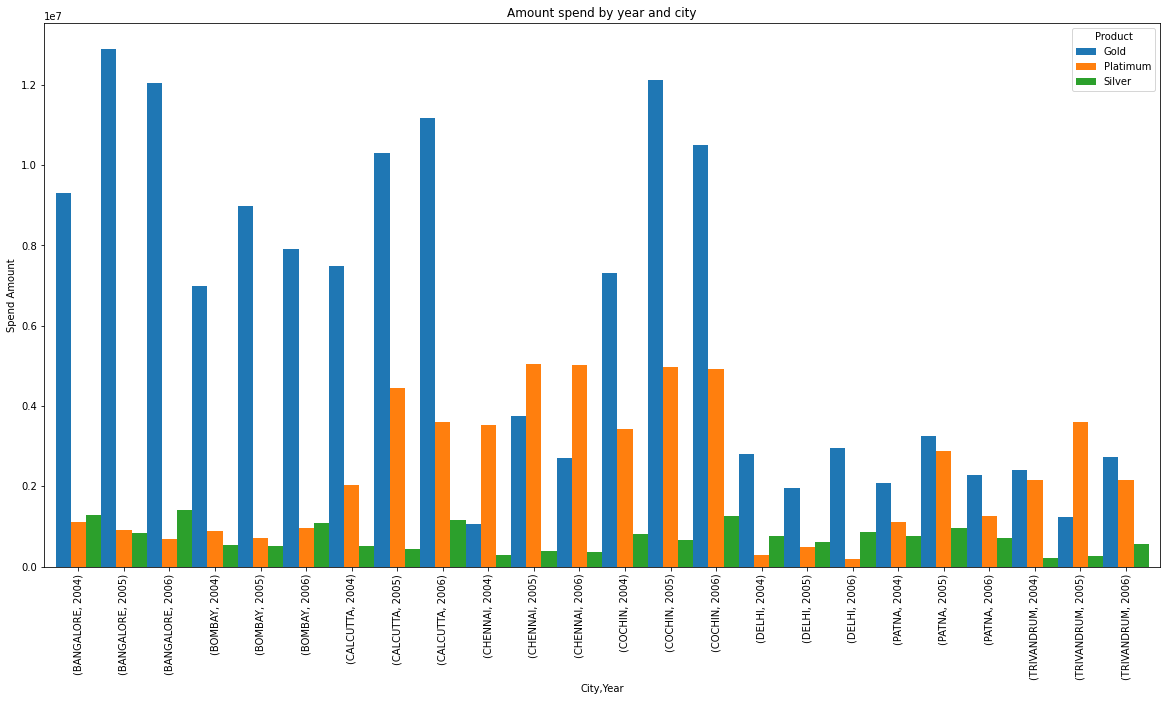

In [222]:
# grphical representation

customer_spend_pivot.plot(kind="bar",figsize=(20,10),width=1)
plt.ylabel("Spend Amount")
plt.title("Amount spend by year and city")
plt.show()

### 4. Create graphs for

#### a. Monthly comparison of total spends, city wise

In [223]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005


In [224]:
# extracting month and creating a column

customer_spend['Monthly'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))

In [225]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005,January


In [226]:
#grouping data based on "Monthly" and "City" columns

month_city = customer_spend.groupby(["Monthly","City"])[["Amount"]].sum().sort_index().reset_index()

In [227]:
# pivot table for better view

month_city =pd.pivot_table(data=customer_spend,values='Amount',index='City',columns='Monthly',aggfunc='sum')

In [228]:
month_city

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


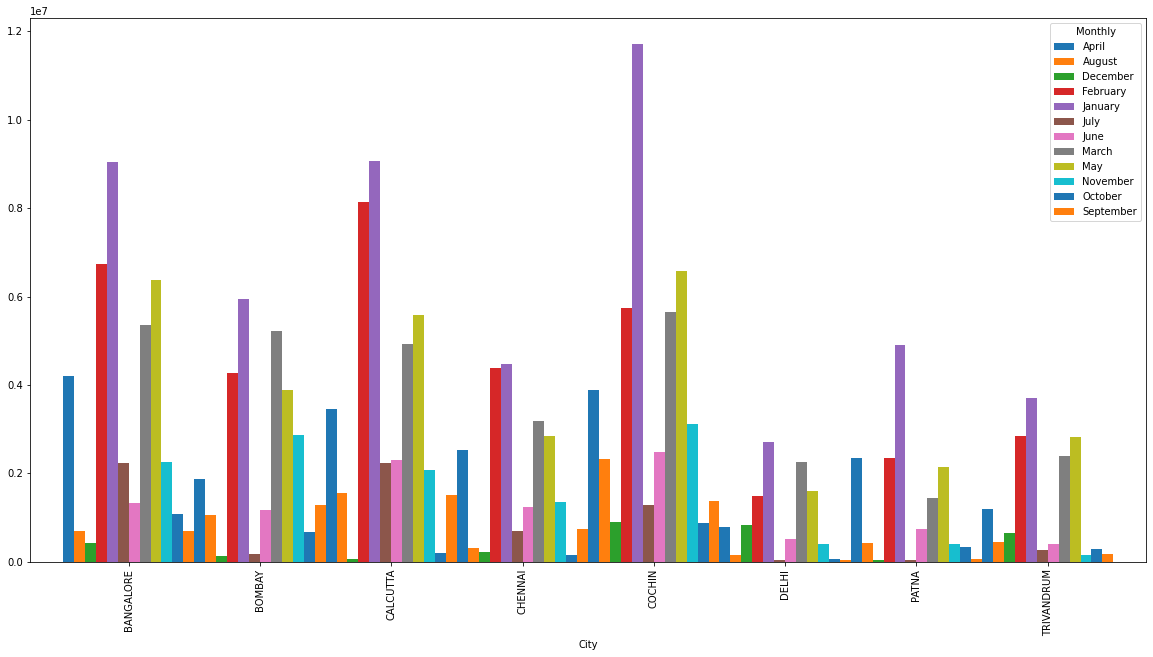

In [229]:
month_city.plot(kind="bar",figsize=(20,10),width=1)
plt.show()

#### b. Comparison of yearly spend on air tickets 

In [230]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005,January


In [231]:
spend_type = customer_spend.groupby(["Year","Type"])[["Amount"]].sum().reset_index()

In [232]:
spend_type

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
1,2004,AUTO,254745.28
2,2004,BIKE,476635.28
3,2004,BUS TICKET,5822074.21
4,2004,CAMERA,10122819.72
5,2004,CAR,2326442.62
6,2004,CLOTHES,2685429.91
7,2004,FOOD,7727298.46
8,2004,JEWELLERY,2579785.80
9,2004,MOVIE TICKET,1588392.99


In [233]:
air=spend_type.loc[spend_type["Type"]=="AIR TICKET"]

In [234]:
air

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


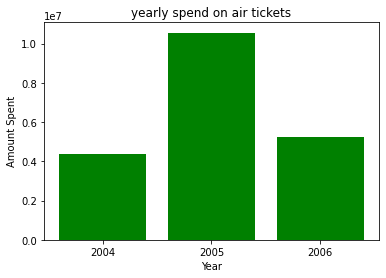

In [235]:
plt.bar(air["Year"],height=air["Amount"],color="green")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("yearly spend on air tickets")
plt.show()

#### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [236]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005,January


In [237]:
# pivot table for better view

product_data = pd.pivot_table(data=customer_spend,
                              index='Product',
                              columns='Monthly',
                              values='Amount',
                              aggfunc='sum'
                             )

In [238]:
product_data

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


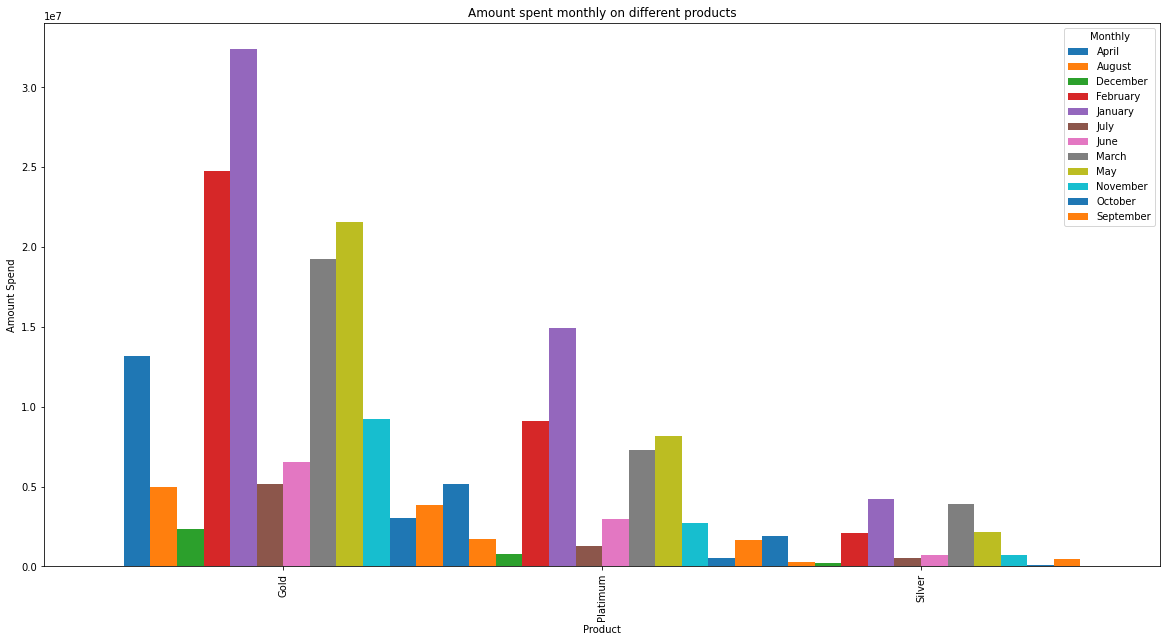

In [239]:
product_data.plot(kind="bar",figsize=(20,10),width=1)
plt.ylabel("Amount Spend")
plt.title("Amount spent monthly on different products")
plt.show()

#### We can see from the above graph that the sales are high for all the Products during the months:

* January
* February
* March
* April
* May

#### Out of these months,highest sales are in January

## Product Frequency

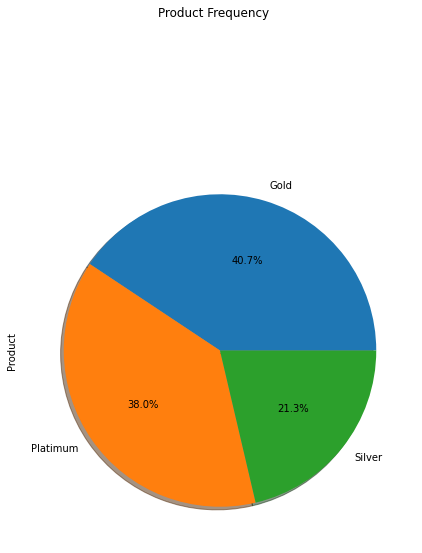

In [240]:
plt.suptitle("Product Frequency")
customer_spend['Product'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,figsize=(7,10),)
plt.show()

#### Silver clients: they represent 21% of our customers
#### Gold clients: they represent 41% of our customers
#### Platinum clients: they represent 38% of our customers

In [280]:
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,50-58,2004,January
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,50-58,2004,January
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,50-58,2004,January
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,34-42,2004,January


## Analysis on Silver Clients

In [249]:
sil = customer_spend['Product'] == 'Silver'
silver = customer_spend[sil]
silver

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year,Monthly
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104,2004-01-03,RENTAL,50000.00,66-74,2004,January
19,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,118,2005-02-28,TRAIN TICKET,50000.00,66-74,2005,February
20,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,132,2004-04-06,BUS TICKET,50000.00,66-74,2004,April
21,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,146,2004-11-23,PETRO,50000.00,66-74,2004,November
22,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,160,2005-09-03,JEWELLERY,50000.00,66-74,2005,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,85,A85,59.0,CHENNAI,Silver,100001.0,C8,Govt,87,2006-03-28,BUS TICKET,50000.50,58-66,2006,March
1485,86,A86,25.0,TRIVANDRUM,Silver,100002.0,C9,Govt,88,2006-03-29,TRAIN TICKET,50001.00,18-26,2006,March
1486,87,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,89,2006-03-30,RENTAL,50001.50,26-34,2006,March
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,50-58,2004,January


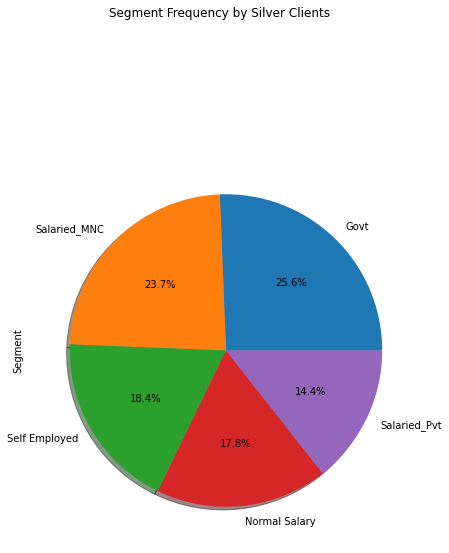

In [258]:
plt.figure(figsize=(7,10))
silver["Segment"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.suptitle("Segment Frequency by Silver Clients")
plt.show()

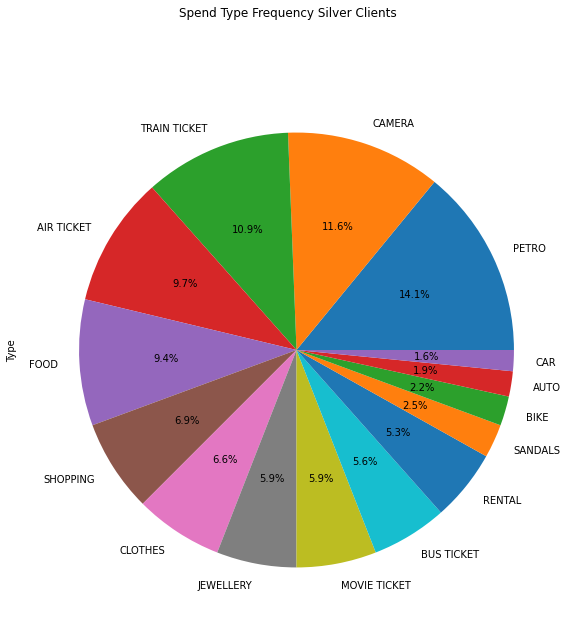

In [259]:
silver["Type"].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,10),)
plt.suptitle("Spend Type Frequency Silver Clients")
plt.show()

## Analysis on Gold Clients

In [255]:
gol = customer_spend['Product'] == 'Gold'
gold = customer_spend[gol]
gold

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,91,A91,41.0,BOMBAY,Gold,500000.0,C14,Govt,93,2006-04-03,CLOTHES,89951.84,34-42,2006,April
1491,92,A92,78.0,BANGALORE,Gold,500000.0,C15,Govt,94,2006-04-04,FOOD,341858.87,74-82,2006,April
1492,93,A93,56.0,DELHI,Gold,500000.0,C16,Govt,95,2004-01-12,CAMERA,297505.09,50-58,2004,January
1493,94,A94,31.0,COCHIN,Gold,500000.0,C17,Govt,96,2004-01-03,SANDALS,312714.37,26-34,2004,January


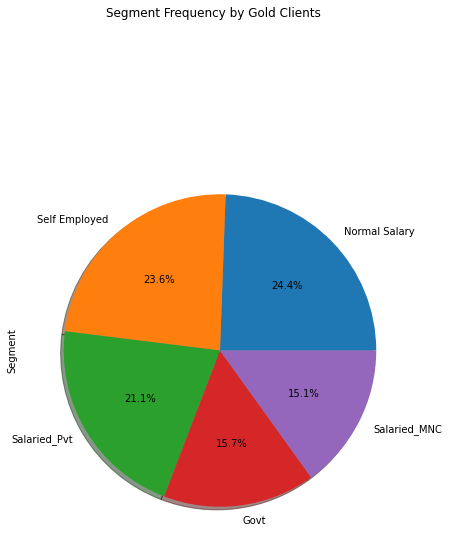

In [260]:
plt.figure(figsize=(7,10))
gold["Segment"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.suptitle("Segment Frequency by Gold Clients")
plt.show()

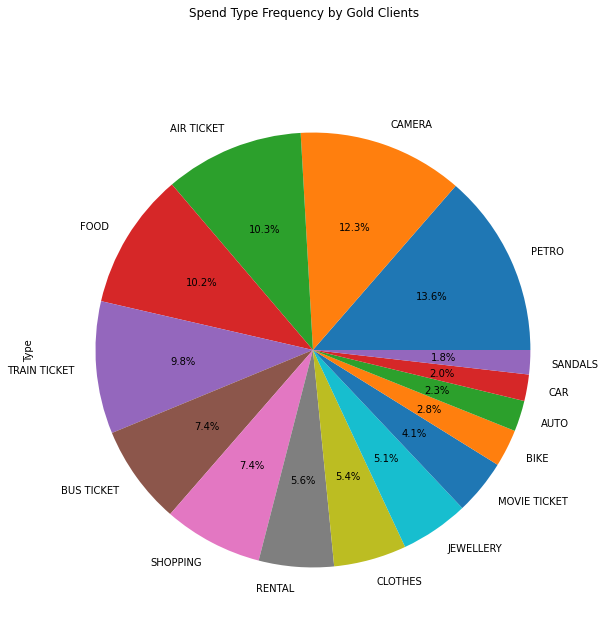

In [261]:
gold["Type"].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,10),)
plt.suptitle("Spend Type Frequency by Gold Clients")
plt.show()

## Analysis on Platinum Clients

In [266]:
pla = customer_spend['Product'] == 'Platimum'
platinum = customer_spend[pla]
platinum

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year,Monthly
29,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,105,2004-01-15,MOVIE TICKET,5000.0,26-34,2004,January
30,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,119,2005-02-16,TRAIN TICKET,5000.0,26-34,2005,February
31,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,133,2005-04-27,TRAIN TICKET,5000.0,26-34,2005,April
32,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,147,2005-05-24,PETRO,5000.0,26-34,2005,May
33,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,161,2005-10-03,PETRO,5000.0,26-34,2005,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,71,A71,34.0,BOMBAY,Platimum,10002.0,C33,Self Employed,1500,2006-03-24,BUS TICKET,5001.0,26-34,2006,March
1482,83,A83,37.0,COCHIN,Platimum,10002.0,C6,Govt,85,2006-03-26,SHOPPING,5001.0,34-42,2006,March
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.0,50-58,2004,January
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.5,50-58,2004,January


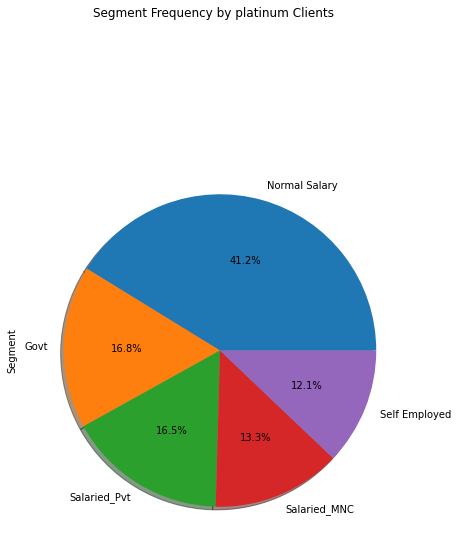

In [268]:
plt.figure(figsize=(7,10))
platinum["Segment"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.suptitle("Segment Frequency by platinum Clients")
plt.show()

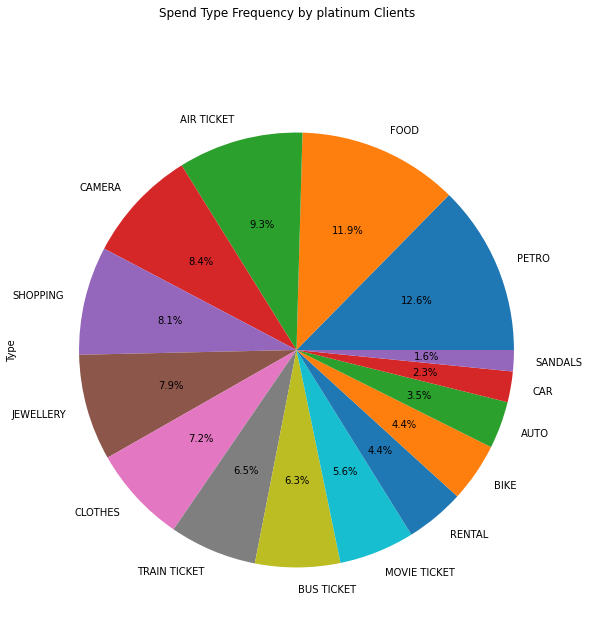

In [269]:
platinum["Type"].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,10),)
plt.suptitle("Spend Type Frequency by platinum Clients")
plt.show()

# Conclusions

* Number of distinct customers are 100
* We can see from the countplot that number of distinct categories are 5
* From above pie chart we can see that Cochin is having maximum spend.
* From the pie chart shown above we can say that age group 42 - 50 is spending more money
* We can see from the above graph that the sales are high for all the Products during the months:

    - January
	- February
	- March
	- April
	- May

    Out of these months,highest sales are in January


### Silver clients : 

They represent 21% of our customers, Their main jobs are in Government (25.6%) and in Multinational Corporations (23.7%), meaning there´s some job and salary stability to them. Their main spends are in Transportation Tickets (26.2%), Petro (14.1%) and Camera (11.6%), indicating it´s probably a niche with high interest in leisure trips. The strategy advice for this niche is keeping it as a stable base of clients, but with a potential to grow, offering them trip related products.

### Gold clients:

They represent 41% of our customers, Their main jobs are as Self Employed (23.6%) and Normal Job (24.4%), making it the group that can oscillate most in terms of job and salary stability, what´s also a point to consider when increasing their Limits. Their main spends are in Transportation Tickets (27.5%), Petro (13.6%) and Camera (12.3%). It´s also probably a niche with high interest in leisure trips, so we could increase advertisements related to it. This group is the one that will probably most grow in spends in times of economic growth and will most decrease in times of economic depression, but it´s currently growing fast, so the company should take the opportunity to bring this type of customers from the market and gain market share

### Platinum clients:

They represent 38% of our customers, Their main jobs are Normal Salary (41.2%), followed by Government and Salaried Pvt, both with 17% each, indicating it´s a group that can oscillate a bit in terms of job stability and salary. Their main spend are Transportation Tickets (21%), Petro (13%) and Food (12%). This niche represents the one with the highest spends per client, plus they have some salary stability and are good payers, so they really need to be treated with special attention as premium clients. The company strategy here needs to be in retaining them, investing in relationship, offering products they want and maybe increasing their Limits.